In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle

In [2]:
data = pd.read_csv('redhen_preprocessed.csv')
data.head()

,Unnamed: 0,StoryID,Excerpt,CodesApplied_Combined,ACCOUNT,ACCOUNT_Cultural,ACCOUNT_Individual,ACCOUNT_Other,COMMUNITYRECOVERY,EVENT,...,TRAUMA_Societal,VICTIMS,word_count,char_count,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean
0,7992,NI3079,Elliot Rodger Wangs roommate stabbed Wang and ...,EVENT,0,0,0,0,99,1,...,99,0,34,215.0,elliot rodger wangs roommate stabbed wang two ...,"['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wang', 'roommat', 'stab'...","['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wang', 'roommat', 'stab'..."
1,4686,NI2689,Because the tragedy unfolded at the start of a...,RESOURCES,0,0,0,0,99,0,...,99,0,32,228.0,tragedy unfolded start holiday weekend school ...,"['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedi', 'unfold', 'start', 'holiday', 'wee...","['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedi', 'unfold', 'start', 'holiday', 'wee..."
2,6130,NI2400,Gunrelated restraining orders Also passed in r...,"POLICY, POLICY- Guns, POLICY- Mental health",0,0,0,0,99,0,...,99,0,122,734.0,gunrelated restraining orders also passed resp...,"['gunrelated', 'restraining', 'orders', 'also'...","['gunrelated', 'restraining', 'orders', 'also'...","['gunrel', 'restrain', 'order', 'also', 'pass'...","['gunrelated', 'restraining', 'order', 'also',...","['gunrel', 'restrain', 'order', 'also', 'pass'..."
3,5876,NI1393,Linder said she will also remember Weiss for h...,"VICTIMS, GRIEF/LOSS",0,0,0,0,99,0,...,99,1,100,499.0,linder said also remember weiss epic shot pool...,"['linder', 'said', 'also', 'remember', 'weiss'...","['linder', 'said', 'also', 'remember', 'weiss'...","['linder', 'said', 'also', 'rememb', 'weiss', ...","['linder', 'said', 'also', 'remember', 'wei', ...","['linder', 'said', 'also', 'rememb', 'weiss', ..."
4,4126,NI3259,I mean I know how this goes We all do Werent y...,"ACCOUNTABILITY, ACCOUNT- Culture/societal risk...",1,1,0,0,99,0,...,99,0,85,425.0,mean know goes werent sort expecting father on...,"['mean', 'know', 'goes', 'werent', 'sort', 'ex...","['mean', 'know', 'goes', 'werent', 'sort', 'ex...","['mean', 'know', 'goe', 'werent', 'sort', 'exp...","['mean', 'know', 'go', 'werent', 'sort', 'expe...","['mean', 'know', 'goe', 'werent', 'sort', 'exp..."


In [3]:
data.shape

(8131, 62)

In [4]:
#Culture, indi, other
#0, 0, 0 - 0
#0, 0, 1 - 1
#0, 1, 0 - 2
#0, 1, 1 - 3
#1, 0, 0 - 4
#1, 0, 1 - 5
#1, 1, 0 - 6
#1, 1, 1 - 7

In [9]:
data['target'] = data['ACCOUNT_Cultural']*1 + data['ACCOUNT_Individual']*4 + data['ACCOUNT_Other']*8

In [10]:
data.target.unique()

array([ 0,  1,  8,  5,  4, 12])

In [11]:
data.shape

(8131, 63)

In [14]:
data.columns

Index(['Unnamed: 0', 'StoryID', 'Excerpt', 'CodesApplied_Combined', 'ACCOUNT',
       'ACCOUNT_Cultural', 'ACCOUNT_Individual', 'ACCOUNT_Other',
       'COMMUNITYRECOVERY', 'EVENT', 'GRIEF', 'GRIEF_Individual',
       'GRIEF_Community', 'GRIEF_Societal', 'HERO', 'INVESTIGATION', 'JOURNEY',
       'JOURNEY_Mental', 'JOURNEY_Physical', 'LEGAL', 'MEDIA', 'MISCELLANEOUS',
       'MOURNING', 'MOURNING_Individual', 'MOURNING_Community',
       'MOURNING_Societal', 'PERPETRATOR', 'PHOTO', 'POLICY', 'POLICY_Guns',
       'POLICY_InfoSharing', 'POLICY_MentalHealth', 'POLICY_Other',
       'POLICY_VictimAdv', 'POLICY_OtherAdv', 'POLICY_Practice',
       'PRIVATESECTOR', 'RACECULTURE', 'RESOURCES', 'SAFETY',
       'SAFETY_Community', 'SAFETY_Individual', 'SAFETY_SchoolOrg',
       'SAFETY_Societal', 'SOCIALSUPPORT', 'THREAT', 'THREAT_Assessment',
       'TRAUMA', 'TRAUMA_Physical', 'TRAUMA_Psychological',
       'TRAUMA_Individual', 'TRAUMA_Community', 'TRAUMA_Societal', 'VICTIMS',
       'word_

In [15]:
data = data[['StoryID', 'Excerpt', 'Excerpt_pre', 'Excerpt_tokenized',
       'Excerpt_nonstop', 'Excerpt_stemmed', 'Excerpt_lemmatized',
       'Excerpt_clean', 'target']]

In [16]:
data.shape

(8131, 9)

In [19]:
a = data.loc[data['target']==0]
a['target']='Not Accountable'
a.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
0,NI3079,Elliot Rodger Wangs roommate stabbed Wang and ...,elliot rodger wangs roommate stabbed wang two ...,"['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wang', 'roommat', 'stab'...","['elliot', 'rodger', 'wangs', 'roommate', 'sta...","['elliot', 'rodger', 'wang', 'roommat', 'stab'...",Not Accountable
1,NI2689,Because the tragedy unfolded at the start of a...,tragedy unfolded start holiday weekend school ...,"['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedi', 'unfold', 'start', 'holiday', 'wee...","['tragedy', 'unfolded', 'start', 'holiday', 'w...","['tragedi', 'unfold', 'start', 'holiday', 'wee...",Not Accountable
2,NI2400,Gunrelated restraining orders Also passed in r...,gunrelated restraining orders also passed resp...,"['gunrelated', 'restraining', 'orders', 'also'...","['gunrelated', 'restraining', 'orders', 'also'...","['gunrel', 'restrain', 'order', 'also', 'pass'...","['gunrelated', 'restraining', 'order', 'also',...","['gunrel', 'restrain', 'order', 'also', 'pass'...",Not Accountable
3,NI1393,Linder said she will also remember Weiss for h...,linder said also remember weiss epic shot pool...,"['linder', 'said', 'also', 'remember', 'weiss'...","['linder', 'said', 'also', 'remember', 'weiss'...","['linder', 'said', 'also', 'rememb', 'weiss', ...","['linder', 'said', 'also', 'remember', 'wei', ...","['linder', 'said', 'also', 'rememb', 'weiss', ...",Not Accountable
5,NI1186,But three days after Cheng Yuan James Hong Ge...,three days cheng yuan james hong george chen w...,"['three', 'days', 'cheng', 'yuan', 'james', 'h...","['three', 'days', 'cheng', 'yuan', 'james', 'h...","['three', 'day', 'cheng', 'yuan', 'jame', 'hon...","['three', 'day', 'cheng', 'yuan', 'james', 'ho...","['three', 'day', 'cheng', 'yuan', 'jame', 'hon...",Not Accountable


In [20]:
a.shape

(6330, 9)

In [21]:
b = data.loc[data['target']==1]
b['target']='Cultural'
b.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
4,NI3259,I mean I know how this goes We all do Werent y...,mean know goes werent sort expecting father on...,"['mean', 'know', 'goes', 'werent', 'sort', 'ex...","['mean', 'know', 'goes', 'werent', 'sort', 'ex...","['mean', 'know', 'goe', 'werent', 'sort', 'exp...","['mean', 'know', 'go', 'werent', 'sort', 'expe...","['mean', 'know', 'goe', 'werent', 'sort', 'exp...",Cultural
19,NI1111,At the earlier press conference Martinez shook...,earlier press conference martinez shook visibl...,"['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'confer', 'martinez', 'sh...","['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'confer', 'martinez', 'sh...",Cultural
30,NI3229,Shall I observe that a gun is a weapon of mass...,shall observe gun weapon mass destruction ment...,"['shall', 'observe', 'gun', 'weapon', 'mass', ...","['shall', 'observe', 'gun', 'weapon', 'mass', ...","['shall', 'observ', 'gun', 'weapon', 'mass', '...","['shall', 'observe', 'gun', 'weapon', 'mass', ...","['shall', 'observ', 'gun', 'weapon', 'mass', '...",Cultural
36,NI2075,At the earlier press conference Martinez shook...,earlier press conference martinez shook visibl...,"['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'confer', 'martinez', 'sh...","['earlier', 'press', 'conference', 'martinez',...","['earlier', 'press', 'confer', 'martinez', 'sh...",Cultural
43,NI2719,Before the killings Rodgers mother became alar...,killings rodgers mother became alarmed bizarre...,"['killings', 'rodgers', 'mother', 'became', 'a...","['killings', 'rodgers', 'mother', 'became', 'a...","['kill', 'rodger', 'mother', 'becam', 'alarm',...","['killing', 'rodgers', 'mother', 'became', 'al...","['kill', 'rodger', 'mother', 'becam', 'alarm',...",Cultural


In [22]:
b.shape

(979, 9)

In [23]:
c = data.loc[data['target']==4]
c['target']='Individual'
c.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
76,NI2957,Some crackpot who couldnt get a date stabs and...,crackpot couldnt get date stabs shoots way acr...,"['crackpot', 'couldnt', 'get', 'date', 'stabs'...","['crackpot', 'couldnt', 'get', 'date', 'stabs'...","['crackpot', 'couldnt', 'get', 'date', 'stab',...","['crackpot', 'couldnt', 'get', 'date', 'stab',...","['crackpot', 'couldnt', 'get', 'date', 'stab',...",Individual
125,NI1105,Certainly he didn t feel loved by his communit...,certainly feel loved community said void life ...,"['certainly', 'feel', 'loved', 'community', 's...","['certainly', 'feel', 'loved', 'community', 's...","['certainli', 'feel', 'love', 'commun', 'said'...","['certainly', 'feel', 'loved', 'community', 's...","['certainli', 'feel', 'love', 'commun', 'said'...",Individual
140,NI3126,Elliot Rodger took six lives in a planned ramp...,elliot rodger took six lives planned rampage s...,"['elliot', 'rodger', 'took', 'six', 'lives', '...","['elliot', 'rodger', 'took', 'six', 'lives', '...","['elliot', 'rodger', 'took', 'six', 'live', 'p...","['elliot', 'rodger', 'took', 'six', 'life', 'p...","['elliot', 'rodger', 'took', 'six', 'live', 'p...",Individual
181,NI2293,Years later in a now infamous YouTube video he...,years later infamous youtube video laid chilli...,"['years', 'later', 'infamous', 'youtube', 'vid...","['years', 'later', 'infamous', 'youtube', 'vid...","['year', 'later', 'infam', 'youtub', 'video', ...","['year', 'later', 'infamous', 'youtube', 'vide...","['year', 'later', 'infam', 'youtub', 'video', ...",Individual
183,NI1317,After elementary school and with the advent of...,elementary school advent puberty life became b...,"['elementary', 'school', 'advent', 'puberty', ...","['elementary', 'school', 'advent', 'puberty', ...","['elementari', 'school', 'advent', 'puberti', ...","['elementary', 'school', 'advent', 'puberty', ...","['elementari', 'school', 'advent', 'puberti', ...",Individual


In [24]:
c.shape

(613, 9)

In [25]:
d = data.loc[data['target']==8]
d['target']='Other'
d.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
60,NI2814,The Isla Vista murders were not a case of dome...,isla vista murders case domestic violence work...,"['isla', 'vista', 'murders', 'case', 'domestic...","['isla', 'vista', 'murders', 'case', 'domestic...","['isla', 'vista', 'murder', 'case', 'domest', ...","['isla', 'vista', 'murder', 'case', 'domestic'...","['isla', 'vista', 'murder', 'case', 'domest', ...",Other
265,NI1035,I m in shock said neighbor Svetlana Bakalinsk...,shock said neighbor svetlana bakalinsky along ...,"['shock', 'said', 'neighbor', 'svetlana', 'bak...","['shock', 'said', 'neighbor', 'svetlana', 'bak...","['shock', 'said', 'neighbor', 'svetlana', 'bak...","['shock', 'said', 'neighbor', 'svetlana', 'bak...","['shock', 'said', 'neighbor', 'svetlana', 'bak...",Other
540,NI2268,By the third time I watched the video I was ho...,third time watched video hoping might reveal s...,"['third', 'time', 'watched', 'video', 'hoping'...","['third', 'time', 'watched', 'video', 'hoping'...","['third', 'time', 'watch', 'video', 'hope', 'm...","['third', 'time', 'watched', 'video', 'hoping'...","['third', 'time', 'watch', 'video', 'hope', 'm...",Other
635,NI0009,Santa Barbara County Sheriff Bill Brown did no...,santa barbara county sheriff bill brown offer ...,"['santa', 'barbara', 'county', 'sheriff', 'bil...","['santa', 'barbara', 'county', 'sheriff', 'bil...","['santa', 'barbara', 'counti', 'sheriff', 'bil...","['santa', 'barbara', 'county', 'sheriff', 'bil...","['santa', 'barbara', 'counti', 'sheriff', 'bil...",Other
896,NI1035,So on Saturday morning when some awoke to the ...,saturday morning awoke news pinpointed suspect...,"['saturday', 'morning', 'awoke', 'news', 'pinp...","['saturday', 'morning', 'awoke', 'news', 'pinp...","['saturday', 'morn', 'awok', 'news', 'pinpoint...","['saturday', 'morning', 'awoke', 'news', 'pinp...","['saturday', 'morn', 'awok', 'news', 'pinpoint...",Other


In [26]:
d.shape

(34, 9)

In [27]:
e = data.loc[data['target']==5]
e['target']='CI'
e.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
65,NI2577,One thing for sure Every legal expert agrees t...,one thing sure every legal expert agrees rodge...,"['one', 'thing', 'sure', 'every', 'legal', 'ex...","['one', 'thing', 'sure', 'every', 'legal', 'ex...","['one', 'thing', 'sure', 'everi', 'legal', 'ex...","['one', 'thing', 'sure', 'every', 'legal', 'ex...","['one', 'thing', 'sure', 'everi', 'legal', 'ex...",CI
73,NI3119,Certainly the latest murderous rampage carried...,certainly latest murderous rampage carried you...,"['certainly', 'latest', 'murderous', 'rampage'...","['certainly', 'latest', 'murderous', 'rampage'...","['certainli', 'latest', 'murder', 'rampag', 'c...","['certainly', 'latest', 'murderous', 'rampage'...","['certainli', 'latest', 'murder', 'rampag', 'c...",CI
74,NI1605,In a 137page manifesto Rodger wrote that he wo...,137page manifesto rodger wrote would commit ma...,"['137page', 'manifesto', 'rodger', 'wrote', 'w...","['137page', 'manifesto', 'rodger', 'wrote', 'w...","['137page', 'manifesto', 'rodger', 'wrote', 'w...","['137page', 'manifesto', 'rodger', 'wrote', 'w...","['page', 'manifesto', 'rodger', 'wrote', 'woul...",CI
83,NI2915,I got into an online debate recently with Lind...,got online debate recently lindsay beyerstein ...,"['got', 'online', 'debate', 'recently', 'linds...","['got', 'online', 'debate', 'recently', 'linds...","['got', 'onlin', 'debat', 'recent', 'lindsay',...","['got', 'online', 'debate', 'recently', 'linds...","['got', 'onlin', 'debat', 'recent', 'lindsay',...",CI
118,NI1286,In\nthe meantime Santa Barbara County Sheriff ...,meantime santa barbara county sheriff bill bro...,"['meantime', 'santa', 'barbara', 'county', 'sh...","['meantime', 'santa', 'barbara', 'county', 'sh...","['meantim', 'santa', 'barbara', 'counti', 'she...","['meantime', 'santa', 'barbara', 'county', 'sh...","['meantim', 'santa', 'barbara', 'counti', 'she...",CI


In [28]:
e.shape

(174, 9)

In [29]:
f = data.loc[data['target']==12]
f['target']='IO'
f.head()

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
3742,NI2903,In that manifesto he described his life story ...,manifesto described life story frustration abl...,"['manifesto', 'described', 'life', 'story', 'f...","['manifesto', 'described', 'life', 'story', 'f...","['manifesto', 'describ', 'life', 'stori', 'fru...","['manifesto', 'described', 'life', 'story', 'f...","['manifesto', 'describ', 'life', 'stori', 'fru...",IO


In [30]:
f.shape

(1, 9)

In [31]:
1 + 174 + 34 + 613 + 979 +6330

8131

In [36]:
dataframe = [a, b, c, d, e, f]
data = pd.concat(dataframe)
data.shape

(8131, 9)

In [39]:
data = shuffle(data)
data.head()

,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
2292,NI2424,If Lemus an El Camino College communications s...,lemus el camino college communications student...,"['lemus', 'el', 'camino', 'college', 'communic...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...",Not Accountable
6577,NI1755,Questions about violent entertainment gained n...,questions violent entertainment gained new urg...,"['questions', 'violent', 'entertainment', 'gai...","['questions', 'violent', 'entertainment', 'gai...","['question', 'violent', 'entertain', 'gain', '...","['question', 'violent', 'entertainment', 'gain...","['question', 'violent', 'entertain', 'gain', '...",Cultural
4613,NI3175,Jackson who attended a Saturday vigil in Isla ...,jackson attended saturday vigil isla vista sai...,"['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...",Not Accountable
6332,NI2983,It was a sentiment shared by Chens mother Kell...,sentiment shared chens mother kelly wang lelan...,"['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'share', 'chen', 'mother', 'kell...","['sentiment', 'shared', 'chen', 'mother', 'kel...","['sentiment', 'share', 'chen', 'mother', 'kell...",Not Accountable
5245,NI2628,Today her father Dan Cooper will remember that...,today father dan cooper remember spirit spends...,"['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...",Not Accountable


In [40]:
data.target.unique()

array(['Not Accountable', 'Cultural', 'Individual', 'Other', 'CI', 'IO'],
      dtype=object)

In [56]:
import pickle
with open('complete_redhen_dataframe', 'wb') as fp:
    pickle.dump(data, fp)

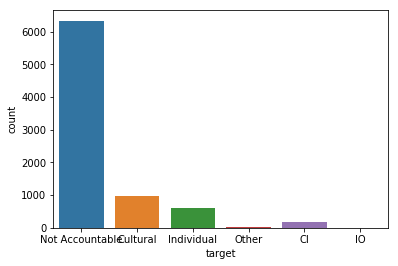

In [42]:
import seaborn as sns
sns.countplot(x = 'target', data = data)

In [43]:
%load_ext autoreload
%autoreload 2

In [44]:
%matplotlib inline

In [45]:
# DataFrame
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [52]:
# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

In [53]:
# Utility
import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

In [54]:
# Set log
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [58]:
# DATASET
DATASET_ENCODING = "ISO-8859-1"
TRAIN_SIZE = 0.8

# TEXT CLENAING
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

# WORD2VEC 
W2V_SIZE = 300
W2V_WINDOW = 7
W2V_EPOCH = 32
W2V_MIN_COUNT = 10

# KERAS
SEQUENCE_LENGTH = 300
EPOCHS = 8
BATCH_SIZE = 1024

# EXPORT
KERAS_MODEL = "model_classifier.h5"
WORD2VEC_MODEL = "model_classifier.w2v"
TOKENIZER_MODEL = "tokenizer_classifier.pkl"
ENCODER_MODEL = "encoder_classifier.pkl"

In [59]:
data.head()

,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
2292,NI2424,If Lemus an El Camino College communications s...,lemus el camino college communications student...,"['lemus', 'el', 'camino', 'college', 'communic...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...",Not Accountable
6577,NI1755,Questions about violent entertainment gained n...,questions violent entertainment gained new urg...,"['questions', 'violent', 'entertainment', 'gai...","['questions', 'violent', 'entertainment', 'gai...","['question', 'violent', 'entertain', 'gain', '...","['question', 'violent', 'entertainment', 'gain...","['question', 'violent', 'entertain', 'gain', '...",Cultural
4613,NI3175,Jackson who attended a Saturday vigil in Isla ...,jackson attended saturday vigil isla vista sai...,"['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...",Not Accountable
6332,NI2983,It was a sentiment shared by Chens mother Kell...,sentiment shared chens mother kelly wang lelan...,"['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'share', 'chen', 'mother', 'kell...","['sentiment', 'shared', 'chen', 'mother', 'kel...","['sentiment', 'share', 'chen', 'mother', 'kell...",Not Accountable
5245,NI2628,Today her father Dan Cooper will remember that...,today father dan cooper remember spirit spends...,"['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...",Not Accountable


In [60]:
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

In [61]:
def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [62]:
%%time
data.Excerpt = data.Excerpt.apply(lambda x: preprocess(x))

CPU times: user 1.91 s, sys: 3.4 ms, total: 1.91 s
Wall time: 1.91 s


In [63]:
data.columns

Index(['StoryID', 'Excerpt', 'Excerpt_pre', 'Excerpt_tokenized',
       'Excerpt_nonstop', 'Excerpt_stemmed', 'Excerpt_lemmatized',
       'Excerpt_clean', 'target'],
      dtype='object')

In [64]:
df_train, df_test = train_test_split(data, test_size=1-TRAIN_SIZE, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 6504
TEST size: 1627


In [65]:
%%time
documents = [_text.split() for _text in df_train.Excerpt] 

CPU times: user 39.1 ms, sys: 7.98 ms, total: 47.1 ms
Wall time: 46.3 ms


In [66]:
w2v_model = gensim.models.word2vec.Word2Vec(size=W2V_SIZE, 
                                            window=W2V_WINDOW, 
                                            min_count=W2V_MIN_COUNT, 
                                            workers=8)

In [67]:
w2v_model.build_vocab(documents)

2019-04-06 18:44:03,358 : INFO : collecting all words and their counts
2019-04-06 18:44:03,359 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-04-06 18:44:03,423 : INFO : collected 12038 word types from a corpus of 312153 raw words and 6504 sentences
2019-04-06 18:44:03,424 : INFO : Loading a fresh vocabulary
2019-04-06 18:44:03,437 : INFO : effective_min_count=10 retains 3914 unique words (32% of original 12038, drops 8124)
2019-04-06 18:44:03,438 : INFO : effective_min_count=10 leaves 288980 word corpus (92% of original 312153, drops 23173)
2019-04-06 18:44:03,451 : INFO : deleting the raw counts dictionary of 12038 items
2019-04-06 18:44:03,452 : INFO : sample=0.001 downsamples 42 most-common words
2019-04-06 18:44:03,453 : INFO : downsampling leaves estimated 269005 word corpus (93.1% of prior 288980)
2019-04-06 18:44:03,462 : INFO : estimated required memory for 3914 words and 300 dimensions: 11350600 bytes
2019-04-06 18:44:03,463 : INFO : resetting

In [68]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 3914


In [69]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

2019-04-06 18:44:21,720 : INFO : training model with 8 workers on 3914 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=5 window=7
2019-04-06 18:44:21,964 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-04-06 18:44:21,966 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-04-06 18:44:21,968 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-04-06 18:44:21,970 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:21,973 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-06 18:44:21,974 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-06 18:44:21,985 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-06 18:44:21,988 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-06 18:44:21,989 : INFO : EPOCH - 1 : training on 312153 raw words (269043 effective words) took 0.3s, 1035061 effec

2019-04-06 18:44:24,268 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:24,270 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-06 18:44:24,278 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-06 18:44:24,281 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-06 18:44:24,286 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-06 18:44:24,287 : INFO : EPOCH - 10 : training on 312153 raw words (269044 effective words) took 0.2s, 1146302 effective words/s
2019-04-06 18:44:24,502 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-04-06 18:44:24,511 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-04-06 18:44:24,512 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-04-06 18:44:24,514 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:24,520 : INFO : worker thre

2019-04-06 18:44:26,477 : INFO : EPOCH - 19 : training on 312153 raw words (269021 effective words) took 0.2s, 1197833 effective words/s
2019-04-06 18:44:26,692 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-04-06 18:44:26,696 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-04-06 18:44:26,704 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-04-06 18:44:26,707 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:26,708 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-06 18:44:26,712 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-06 18:44:26,720 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-06 18:44:26,722 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-06 18:44:26,722 : INFO : EPOCH - 20 : training on 312153 raw words (269003 effective words) took 0.2s, 1126816 effective words/

2019-04-06 18:44:28,877 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:28,879 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-04-06 18:44:28,888 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-04-06 18:44:28,889 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-04-06 18:44:28,890 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-04-06 18:44:28,891 : INFO : EPOCH - 29 : training on 312153 raw words (268922 effective words) took 0.2s, 1184359 effective words/s
2019-04-06 18:44:29,098 : INFO : worker thread finished; awaiting finish of 7 more threads
2019-04-06 18:44:29,107 : INFO : worker thread finished; awaiting finish of 6 more threads
2019-04-06 18:44:29,109 : INFO : worker thread finished; awaiting finish of 5 more threads
2019-04-06 18:44:29,110 : INFO : worker thread finished; awaiting finish of 4 more threads
2019-04-06 18:44:29,115 : INFO : worker thre

CPU times: user 45.6 s, sys: 257 ms, total: 45.9 s
Wall time: 7.9 s


(8608271, 9988896)

In [70]:
w2v_model.most_similar("gun")

/home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
2019-04-06 18:44:40,158 : INFO : precomputing L2-norms of word weight vectors


[('guncontrol', 0.5564261674880981),
 ('modeled', 0.5461101531982422),
 ('stricter', 0.5342475771903992),
 ('domestic', 0.4778067469596863),
 ('commonsense', 0.46823641657829285),
 ('advocates', 0.43422478437423706),
 ('preventing', 0.4315454363822937),
 ('reduce', 0.4276154041290283),
 ('advocate', 0.42603158950805664),
 ('similar', 0.41607946157455444)]

In [71]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.Excerpt)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 12039
CPU times: user 277 ms, sys: 12 ms, total: 289 ms
Wall time: 288 ms


In [73]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.Excerpt), maxlen=SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.Excerpt), maxlen=SEQUENCE_LENGTH)

CPU times: user 316 ms, sys: 3.98 ms, total: 320 ms
Wall time: 320 ms


In [74]:
data.head()

,StoryID,Excerpt,Excerpt_pre,Excerpt_tokenized,Excerpt_nonstop,Excerpt_stemmed,Excerpt_lemmatized,Excerpt_clean,target
2292,NI2424,lemus el camino college communications student...,lemus el camino college communications student...,"['lemus', 'el', 'camino', 'college', 'communic...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...","['lemus', 'el', 'camino', 'college', 'communic...","['lemu', 'el', 'camino', 'colleg', 'commun', '...",Not Accountable
6577,NI1755,questions violent entertainment gained new urg...,questions violent entertainment gained new urg...,"['questions', 'violent', 'entertainment', 'gai...","['questions', 'violent', 'entertainment', 'gai...","['question', 'violent', 'entertain', 'gain', '...","['question', 'violent', 'entertainment', 'gain...","['question', 'violent', 'entertain', 'gain', '...",Cultural
4613,NI3175,jackson attended saturday vigil isla vista sai...,jackson attended saturday vigil isla vista sai...,"['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...","['jackson', 'attended', 'saturday', 'vigil', '...","['jackson', 'attend', 'saturday', 'vigil', 'is...",Not Accountable
6332,NI2983,sentiment shared chens mother kelly wang lelan...,sentiment shared chens mother kelly wang lelan...,"['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'shared', 'chens', 'mother', 'ke...","['sentiment', 'share', 'chen', 'mother', 'kell...","['sentiment', 'shared', 'chen', 'mother', 'kel...","['sentiment', 'share', 'chen', 'mother', 'kell...",Not Accountable
5245,NI2628,today father dan cooper remember spirit spends...,today father dan cooper remember spirit spends...,"['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...","['today', 'father', 'dan', 'cooper', 'remember...","['today', 'father', 'dan', 'cooper', 'rememb',...",Not Accountable


In [75]:
labels = df_train.target.unique().tolist()
labels

['Not Accountable', 'Individual', 'Cultural', 'CI', 'Other', 'IO']

In [76]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

LabelEncoder()

In [77]:
y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

In [78]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [79]:
print("y_train",y_train.shape)
print("y_test",y_test.shape)

y_train (6504, 1)
y_test (1627, 1)


In [80]:
print("x_train", x_train.shape)
print("y_train", y_train.shape)
print()
print("x_test", x_test.shape)
print("y_test", y_test.shape)

x_train (6504, 300)
y_train (6504, 1)

x_test (1627, 300)
y_test (1627, 1)


In [81]:
y_train[:10]

array([[4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [1],
       [4],
       [4],
       [3]])

In [82]:
embedding_matrix = np.zeros((vocab_size, W2V_SIZE))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(12039, 300)


In [83]:
embedding_layer = Embedding(vocab_size, W2V_SIZE, weights=[embedding_matrix], input_length=SEQUENCE_LENGTH, trainable=False)

In [84]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


2019-04-06 18:47:09,034 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-04-06 18:47:09,121 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          3611700   
_________________________________________________________________
dropout_1 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 3,772,201
Trainable params: 160,501
Non-trainable params: 3,611,700
_________________________________________________________________


In [85]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [86]:
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=5)]

In [87]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1,
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


2019-04-06 18:47:32,556 : WARNING : From /home/spriyanshu723/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 5853 samples, validate on 651 samples
Epoch 1/8
5853/5853 [==============================] - 28s 5ms/step - loss: -0.2426 - acc: 0.0803 - val_loss: -2.9484 - val_acc: 0.1106
Epoch 2/8
5853/5853 [==============================] - 26s 4ms/step - loss: -3.2881 - acc: 0.1083 - val_loss: -8.4531 - val_acc: 0.1290
Epoch 3/8
5853/5853 [==============================] - 26s 4ms/step - loss: -8.5237 - acc: 0.1160 - val_loss: -17.7788 - val_acc: 0.1290
Epoch 4/8
5853/5853 [==============================] - 26s 4ms/step - loss: -18.4365 - acc: 0.1172 - val_loss: -26.6197 - val_acc: 0.1290
Epoch 5/8
5853/5853 [==============================] - 26s 4ms/step - loss: -28.0711 - acc: 0.1172 - val_loss: -33.5323 - val_acc: 0.1290
Epoch 6/8
5853/5853 [==============================] - 26s 4ms/step - loss: -34.8273 - acc: 0.1172 - val_loss: -38.1802 - val_acc: 0.1290
Epoch 7/8
5853/5853 [==============================] - 27s 5ms/step - loss: -38.6500 - acc: 0.1172 - val_loss: -38.9867 - val_acc:

In [88]:
%%time
score = model.evaluate(x_test, y_test, batch_size=BATCH_SIZE)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

1627/1627 [==============================] - 2s 1ms/step

ACCURACY: 0.12845728313292765
LOSS: -39.62337583226519
CPU times: user 12 s, sys: 2.39 s, total: 14.4 s
Wall time: 2.4 s


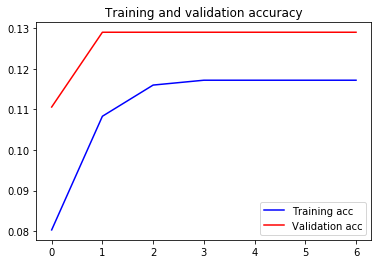

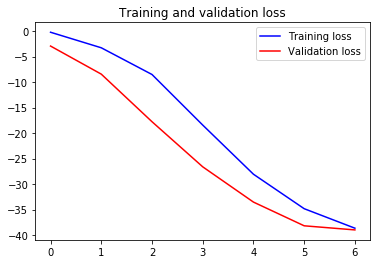

In [89]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()